### import data

In [1]:
from pathlib import Path
import requests

In [2]:
DATA_PATH = Path('data')
PATH = DATA_PATH / "MNIST"

In [3]:
PATH.mkdir(parents=True, exist_ok=True)

In [4]:
URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

In [5]:
if not (PATH/FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH / FILENAME).open('wb').write(content)

### extract data

In [6]:
import pickle
import gzip

In [7]:
with gzip.open((PATH/FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

### view data

In [8]:
from matplotlib import pyplot

In [9]:
import numpy as np

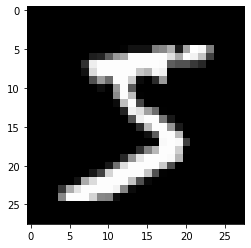

In [10]:
pyplot.imshow(x_train[0].reshape((28,28)), cmap='gray')

In [11]:
x_train.shape

(50000, 784)

### Pytorch 

In [12]:
import torch

In [13]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [14]:
n, c = x_train.shape

In [15]:
print(x_train, x_train.shape, y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([50000, 784]) tensor(0) tensor(9)


In [16]:
import math

### weights and biases

In [17]:
weights = torch.randn(784, 10) / math.sqrt(784)

In [18]:
torch.randn(784, 10)

tensor([[-0.6803, -0.0354, -1.9981,  ..., -0.2302,  0.3015,  0.9687],
        [ 0.9992,  0.9587, -0.0104,  ..., -0.2217,  0.5536, -0.2599],
        [ 1.1200, -0.2160,  0.8465,  ...,  0.3180,  2.8941, -0.7059],
        ...,
        [-0.9744,  0.3165, -1.6288,  ...,  1.1945,  0.2458, -1.0539],
        [ 0.3587, -0.0922, -0.4066,  ...,  0.0783, -0.9030,  0.4634],
        [ 0.3250,  1.7769, -0.2198,  ...,  0.7152, -0.7326, -0.9805]])

In [19]:
weights

tensor([[-8.6100e-05,  1.1262e-02, -2.9244e-02,  ...,  6.9296e-02,
         -1.2017e-02, -6.6242e-02],
        [ 2.3507e-02, -6.3541e-02, -4.8911e-02,  ...,  3.2145e-03,
          2.1916e-02,  2.9634e-03],
        [-3.2772e-02,  2.8917e-02,  2.2421e-02,  ...,  2.1130e-02,
         -5.7345e-02,  2.7759e-02],
        ...,
        [-2.5174e-02, -1.6631e-02, -1.4477e-02,  ...,  3.3027e-02,
          8.3410e-02, -2.3733e-02],
        [ 5.5513e-02,  9.4999e-04, -8.0276e-03,  ...,  1.3849e-02,
          3.9600e-02, -3.3375e-02],
        [-6.8222e-03, -6.9431e-03, -5.0792e-02,  ..., -2.7536e-02,
         -1.8153e-02,  1.0392e-02]])

In [20]:
weights.requires_grad_()

tensor([[-8.6100e-05,  1.1262e-02, -2.9244e-02,  ...,  6.9296e-02,
         -1.2017e-02, -6.6242e-02],
        [ 2.3507e-02, -6.3541e-02, -4.8911e-02,  ...,  3.2145e-03,
          2.1916e-02,  2.9634e-03],
        [-3.2772e-02,  2.8917e-02,  2.2421e-02,  ...,  2.1130e-02,
         -5.7345e-02,  2.7759e-02],
        ...,
        [-2.5174e-02, -1.6631e-02, -1.4477e-02,  ...,  3.3027e-02,
          8.3410e-02, -2.3733e-02],
        [ 5.5513e-02,  9.4999e-04, -8.0276e-03,  ...,  1.3849e-02,
          3.9600e-02, -3.3375e-02],
        [-6.8222e-03, -6.9431e-03, -5.0792e-02,  ..., -2.7536e-02,
         -1.8153e-02,  1.0392e-02]], requires_grad=True)

In [21]:
bias = torch.zeros(10, requires_grad=True)

In [22]:
bias.shape

torch.Size([10])

### Using Torch NN 

In [23]:
"""
NOTE: nn.Module (uppercase M) is a PyTorch specific concept, and is a class we’ll be using a lot. 
      nn.Module is not to be confused with the Python concept of a (lowercase m) module, which 
      is a file of Python code that can be imported.
"""

'\nNOTE: nn.Module (uppercase M) is a PyTorch specific concept, and is a class we’ll be using a lot. \n      nn.Module is not to be confused with the Python concept of a (lowercase m) module, which \n      is a file of Python code that can be imported.\n'

In [24]:
import torch.nn.functional as F

In [25]:
bs = 64  # batch size
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]  # a mini-batch from y

#### accuracy

In [26]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

#### loss fn

In [27]:
loss_func = F.cross_entropy

#### model

In [28]:
def model(xb):
    return xb @ weights + bias

In [29]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(2.3548, grad_fn=<NllLossBackward>) tensor(0.0781)


#### Refactor training loop - nn.Parameter

In [30]:
from torch import nn

In [31]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784,10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))
        
    def forward(self, xb):
        return xb @ self.weights + self.bias

In [32]:
model = Mnist_Logistic()

In [33]:
print(loss_func(model(xb), yb))

tensor(2.2966, grad_fn=<NllLossBackward>)


In [34]:
epochs = 2
lr = 0.5

In [35]:
def fit():
    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            with torch.no_grad():
                # Parameters useful if model is complicated
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

In [36]:
fit()

In [37]:
print(loss_func(model(xb), yb))

tensor(0.2305, grad_fn=<NllLossBackward>)


#### Refactor training loop - nn.Linear

In [38]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
    
    def forward(self, xb):
        return self.lin(xb)

In [39]:
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.3009, grad_fn=<NllLossBackward>)


In [40]:
fit()

In [41]:
print(loss_func(model(xb), yb))

tensor(0.2273, grad_fn=<NllLossBackward>)


### Refactor training loop - torch.optim

In [42]:
from torch import optim

In [43]:
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

In [44]:
model, opt = get_model()

In [45]:
print(loss_func(model(xb), yb))

tensor(2.2892, grad_fn=<NllLossBackward>)


In [46]:
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [47]:
print(loss_func(model(xb), yb))

tensor(0.0827, grad_fn=<NllLossBackward>)


### Refactor training loop - tensorDataset

In [48]:
from torch.utils.data import TensorDataset

In [50]:
train_ds = TensorDataset(x_train, y_train)

In [51]:
## xb, yb = train_ds[i * bs]
## instead of 
## xb = x_train[start_i:end_i]
## yb = y_train[start_i:end_i]

In [55]:
model, opt = get_model()

In [56]:
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        xb, yb = train_ds[i * bs: i * bs + bs]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [57]:
print(loss_func(model(xb), yb))

tensor(0.0817, grad_fn=<NllLossBackward>)


### Refactor training loop - DataLoader

In [58]:
## DataLoader - responsible for managing batches
## DataLoader makes it easier to iterate over batches

In [59]:
from torch.utils.data import DataLoader

In [60]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs)

In [61]:
model, opt = get_model()

In [62]:
for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

In [63]:
print(loss_func(model(xb), yb))

tensor(0.0798, grad_fn=<NllLossBackward>)


### Add validation

In [64]:
model, opt = get_model()

In [66]:
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

In [67]:
valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [69]:
for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)
    
    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.2747)
1 tensor(0.2716)


### Create fit()

In [71]:
## No optimization for validation set so that there is no backprop

In [72]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [73]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

### Create get_data()

In [74]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [75]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.2901530101299286
1 0.2811460674285889


### Expermenting with CNN

In [76]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

In [80]:
## Momentum is a variant of SGD that takes previous updates 
## into account as well and generally leads to faster training.

In [81]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.4133811351299286
1 0.2528521050453186


### Expermenting with Sequential

In [82]:
## A Sequential object runs each of the modules contained within it, in a sequential manner. 
## This is a simpler way of writing our neural network.

In [84]:
# To use seqential, we have to create a custom layer 'Lambda'

In [85]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)


def preprocess(x):
    return x.view(-1, 1, 28, 28)

In [86]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3365607159614563
1 0.21839266757965087


### Wrapping DataLoader

In [87]:
## Our CNN is fairly concise, but it only works with MNIST, because:
## It assumes the input is a 28*28 long vector
## It assumes that the final CNN grid size is 4*4 (since that’s the average
## pooling kernel size we used)

In [88]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y

In [89]:
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

In [90]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [91]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)


In [92]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.6100150789260864
1 0.5370912407159806


### Using GPU 

In [101]:
print(torch.cuda.is_available())

True


In [102]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [103]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [104]:
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [106]:
## GPU card on my system doesn't support CUDA version that PyTorch uses

In [107]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

RuntimeError: cuDNN error: CUDNN_STATUS_ARCH_MISMATCH